In [1]:
from keras.models import Sequential
from keras.layers import  Dense, Conv2D, Flatten, MaxPooling2D
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils import  to_categorical
import numpy as np

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape
X_test.shape

(10000, 28, 28)

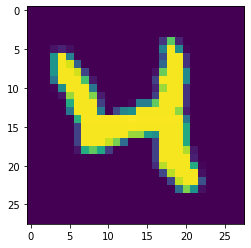

In [3]:
plt.imshow(X_train[20])

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

In [6]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [7]:
#create model
model = Sequential()

#add model layers
model.add(Conv2D(64, kernel_size=(3,3), activation='relu', input_shape=(28,28,1), padding='same'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2))
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [8]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1568)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                15690     
Total params: 34,794
Trainable params: 34,794
Non-trainable params: 0
____________________________________________________

In [9]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3)

Epoch 1/3
1875/1875 [==============================] - 50s 27ms/step - loss: 0.2917 - accuracy: 0.9409 - val_loss: 0.0859 - val_accuracy: 0.9763
Epoch 2/3
1875/1875 [==============================] - 50s 27ms/step - loss: 0.0725 - accuracy: 0.9785 - val_loss: 0.0613 - val_accuracy: 0.9827
Epoch 3/3
1875/1875 [==============================] - 51s 27ms/step - loss: 0.0574 - accuracy: 0.9825 - val_loss: 0.0525 - val_accuracy: 0.9851


In [13]:
y_hat = model.predict(X_test[90:91])
y_hat

array([[1.4660898e-15, 5.8428080e-18, 5.2438871e-14, 1.0000000e+00,
        5.8485672e-16, 3.6860121e-10, 2.7166528e-16, 2.8226115e-15,
        1.2710260e-11, 2.5093497e-10]], dtype=float32)

In [14]:
y_label = np.argmax(y_hat, axis=1)
y_label

array([3], dtype=int64)

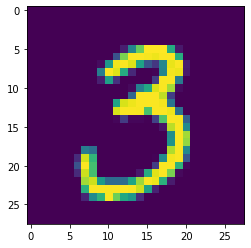

In [15]:
(X_train, y_train), (X_test1, y_test) = mnist.load_data()
plt.imshow(X_test1[90])